In [1]:
import numpy as np
import csv
from matplotlib import pyplot as plt

In [2]:
with open('../size_scalability/THIN/CLOSE/blis.csv', 'r') as f:
    reader = csv.reader(f)
    data_blis = list(reader)

with open('../size_scalability/THIN/CLOSE/oblas.csv', 'r') as f:
    reader = csv.reader(f)
    data_oblas = list(reader)

with open('../size_scalability/THIN/CLOSE/mkl.csv', 'r') as f:
    reader = csv.reader(f)
    data_mkl = list(reader)


with open('../size_scalability/THIN/SPREAD/blis.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_blis = list(reader)

with open('../size_scalability/THIN/SPREAD/oblas.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_oblas = list(reader)

with open('../size_scalability/THIN/SPREAD/mkl.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_mkl = list(reader)

In [3]:
def PLOT (data): 
    data_array = np.array(data[1:], dtype=float)

    data_per_dimension = np.empty((19, 5, 3))
    j = 0
    for i in range(0,19):
            data_per_dimension[i]=  data_array[j:j+5,:]
            j = j + 5

    method = np.empty((19, 3))
    for i in range(0,19):
            method[i]=  np.mean(data_per_dimension[i], axis=0)

    return method
    

In [4]:
mkl=PLOT(data_mkl)
oblas=PLOT(data_oblas)
blis=PLOT(data_blis)

s_mkl=PLOT(s_data_mkl)
s_oblas=PLOT(s_data_oblas)
s_blis=PLOT(s_data_blis)

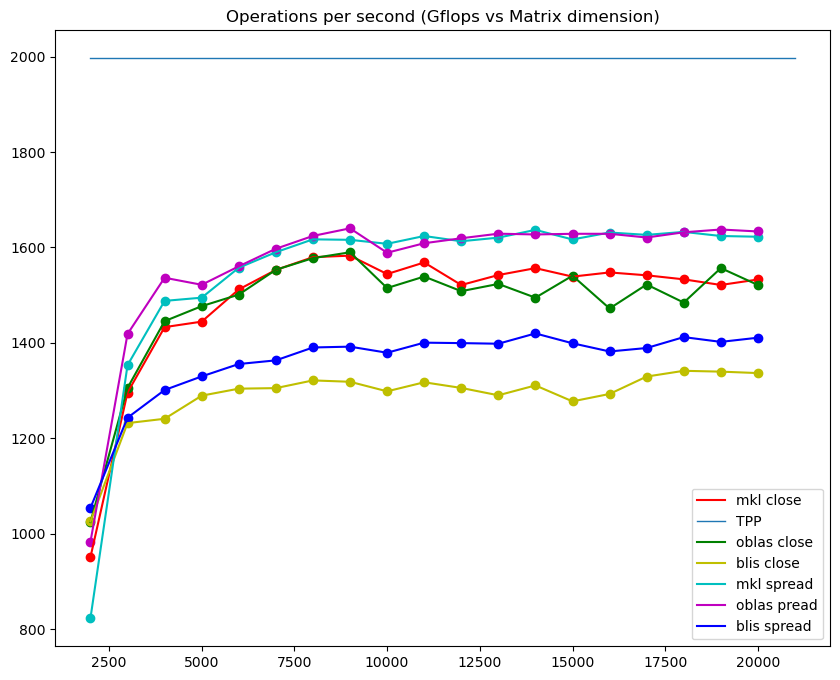

In [6]:
plt.figure(figsize=(10,8))
plt.plot(range(2000,21000,1000), mkl[:,2], color='r', label='mkl close')
plt.scatter(range(2000,21000,1000), mkl[:,2], color='r')

x = np.linspace(2000,21000,19)
y = 166.4*12*(x/x)
plt.plot(x, y, label='TPP', linewidth=1)

plt.plot(range(2000,21000,1000), oblas[:,2], color='g', label='oblas close')
plt.scatter(range(2000,21000,1000), oblas[:,2], color='g')

plt.plot(range(2000,21000,1000), blis[:,2], color='y', label='blis close')
plt.scatter(range(2000,21000,1000), blis[:,2], color='y')

plt.plot(range(2000,21000,1000), s_mkl[:,2], color='c', label='mkl spread')
plt.scatter(range(2000,21000,1000), s_mkl[:,2], color='c')

plt.plot(range(2000,21000,1000), s_oblas[:,2], color='m', label='oblas pread')
plt.scatter(range(2000,21000,1000), s_oblas[:,2], color='m')

plt.plot(range(2000,21000,1000), s_blis[:,2], color='b', label='blis spread')
plt.scatter(range(2000,21000,1000), s_blis[:,2], color='b')

plt.title("Operations per second (Gflops vs Matrix dimension)")
plt.legend()
plt.show()
